# Clovek ne jezi se (aka Mensch aergere dich nicht)



In [1]:
import numpy as np
from random import randint

import networkx as nx

from clovek_ne_jezi_se.game_state import GameState
from clovek_ne_jezi_se.client import Client
from clovek_ne_jezi_se.agents import HumanPlayer
from clovek_ne_jezi_se.utils import (
    GraphQueryParams,
    get_filtered_subgraph_view,
    get_filtered_node_names
)

## Game client

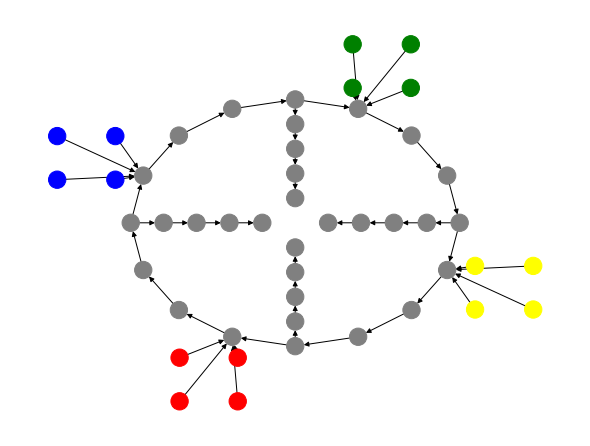

In [2]:
player_names = ['red', 'blue', 'green', 'yellow']
players = [HumanPlayer(name=name) for name in player_names]

client = Client(players=players, main_board_section_length=4, verbose=True)
client.initialize()
client.get_game_state().draw()
# Uncomment for interactive human play
# client.play()

## Graph operations from `utils`, under the hood of `GameState`

The design approach of `GameState` is to hide the graph operations from its API by internally using graph query functions from `clovek_ne_jezi_se.utils`. These queries are parametrized via the container `GraphQueryParams` for node or edge queries, equality or inclusion queries for labeled components having a prescribed value.

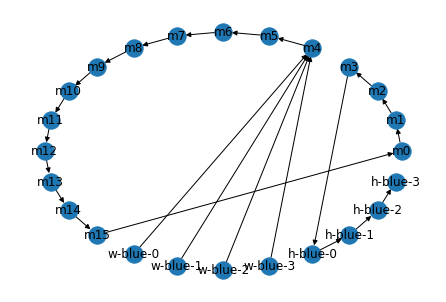

In [3]:
game_state = client.get_game_state()
internal_graph = game_state._graph

player_name = 'blue'
player_subgraph_paramses =  [
    GraphQueryParams(
        graph_component='node', query_type='inclusion', label='allowed_occupants', value=player_name
    ),
    GraphQueryParams(
        graph_component='edge', query_type='inclusion', label='allowed_traversers', value=player_name
    )
]
      
player_subgraph = get_filtered_subgraph_view(internal_graph, player_subgraph_paramses)
nx.draw_circular(player_subgraph, with_labels=True)